Plots transfer of go-defense adversaries to victims.

In [4]:
%load_ext autoreload
%autoreload 2

import math

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1.inset_locator

import utils

plt.style.use(
    [
        "tableau-colorblind10",
        utils.get_style("default"),
        utils.get_style("1-col-aaai"),
        {
            "font.size": 6,
            "ytick.right": False,
            "xtick.major.size": 2.4,
            "xtick.major.pad": 1.5,
            "ytick.major.size": 2.4,
            "ytick.major.pad": 1.5,
        },
    ]
)

utils.import_plt_sty("defense-macros.sty")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
NAN = np.nan
# fmt: off
data_blocks = [
    # outer dimension is victim visits (4, 16, 256, 4096)
    # rows are h0....h9,b18-s8527m,b18-s9997m,vit
    # columns are r0...r9,attack-h9,stall-adv,cont-adv,gift-adv,big-adv,attack-vit
    # value is victim win rate (row's win rate against column)
    # NAN = no data
    #
    # I should've done this programatically instead of
    # hand-writing the results, but at first hand-writing was easier
    # since I already had written and organized some of this for
    # our Notion notebooks
    #
    #       r0                                                            r9
    [
        [  1.0,   1.0,   0.0,   1.0,   1.0,   2.0,   2.0,   1.0,   0.0,  0.0,   1.0,   0.0,   0.0, 100.0,   0.0,  0.5],
        [  6.0,   0.0,   0.0,   4.0,   0.0,   1.0,   0.0,  15.0,   4.0, 16.0,   8.0,   0.0,   9.0,   NAN,   9.0,  NAN],
        [ 13.0,   3.0,   0.0,   2.0,   1.0,   1.0,   3.0,   3.0,   2.0, 10.0,   5.0,   0.0,   0.0,   NAN,  22.0,  NAN],
        [ 15.0,   9.0,   3.0,   1.0,   1.0,   3.0,   0.0,   4.0,   6.0,  9.0,   4.0,   0.0,  17.0,   NAN,  36.5,  NAN],
        [ 12.0,  18.0,  30.0,   9.0,   0.0,   5.0,   3.0,   1.0,   0.0, 14.0,   5.0,   0.0,  16.0,   NAN,  77.0,  NAN],
        [  1.0,  12.0,   3.0,   2.0,   9.0,   3.0,   3.0,   4.0,   1.0, 10.0,   6.0,   0.0,  14.0,   NAN,  36.0,  NAN],
        [  9.0,  12.0,   2.0,   1.0,   3.0,   3.0,   1.0,   3.0,   0.0,  9.0,   3.0,   0.0,  12.0,   NAN,  36.0,  NAN],
        [  4.0,   9.0,   0.0,   0.0,  12.0,   9.0,   5.0,   4.0,   2.0,  9.0,   6.0,   0.0,  10.0,   NAN,  44.5,  NAN],
        [  6.0,  20.0,   3.0,   1.0,  10.0,  10.0,  14.0,  13.0,   3.0,  6.0,   9.0,   0.0,  14.0,   NAN,  68.0,  NAN],
        [ 11.0,  14.0,   1.0,   1.0,   2.0,  10.0,  14.0,  25.0,  12.0,  6.5,   4.5,   0.0,  16.0, 100.0,  65.0, 14.0],
        [100.0,  96.0,  24.0,  70.0,  15.0,  76.0,  66.0,  37.0,  19.0,  0.0,  31.0,  96.0,   0.5,   0.5,   0.0, 93.5],
        [ 98.0,  99.0,  15.0,  80.0,  22.0,  65.0,  78.0,  70.0,  27.0, 21.0,  39.0,  93.0,   5.0,   0.0,   0.0, 93.0],
        [ 45.4,  24.0,   6.0,   5.0,   3.0,   4.0,   1.0,   6.0,   0.0,  1.0,  79.0,  91.0,   5.0, 100.0,  28.0,  1.5],
    ],                                                                                                    
    [                                                                                                     
        [  0.0,   2.0,   2.0,   6.0,   4.0,   7.0,   2.0,   3.0,   1.0,  1.0,   2.0,   1.0,   1.0, 100.0,   2.0,  1.5],
        [ 87.0,   1.5,   2.0,   2.0,   1.0,   3.0,   1.0,   6.0,   8.0,  4.0,  11.0,   0.0,  12.0,   NAN,  18.0,  NAN],
        [ 94.0,  66.0,   0.5,   5.0,  10.0,  21.0,  14.0,   6.0,   3.0,  3.0,   7.0,   0.0,   9.0,   NAN,  44.0,  NAN],
        [ 88.0,  85.0,  87.0,  12.5,   9.0,  27.0,  32.0,   4.0,  10.0,  0.0,   5.0,   0.0,  25.0,   NAN,  90.5,  NAN],
        [ 87.0,  90.0,  84.0,  82.0,   6.0,  75.0,  74.0,   6.0,  13.0,  4.0,   1.0,   1.0,  41.0,   NAN,  95.5,  NAN],
        [ 72.0,  91.0,  85.0,  92.0,  91.0,  49.2,  45.0,   2.0,   5.0,  3.0,   8.0,   0.0,  24.0,   NAN,  84.0,  NAN],
        [ 81.0,  83.0,  83.0,  92.0,  92.0,  90.0,  62.0,   1.0,   7.0,  3.0,   4.0,   0.0,  38.0,   NAN,  90.0,  NAN],
        [ 84.0,  84.0,  82.0,  94.0,  91.0,  86.0,  74.0,   6.0,  14.0,  1.0,  38.0,   0.0,  40.0,   NAN,  87.5,  NAN],
        [ 93.0,  89.0,  87.0,  83.0,  93.0,  92.0,  86.0,  84.0,  75.8,  2.0,   8.0,   0.0,  37.0,   NAN,  92.5,  NAN],
        [ 81.0,  91.0,  77.0,  94.0,  84.0,  92.0,  80.0,  95.0,  94.0,  0.2,   2.5,   1.5,  40.0, 100.0,  92.0, 56.0],
        [ 99.0, 100.0,  67.0,  98.0,  65.0,  96.0,  94.0,  55.0,  54.0,  4.0,  86.0,  99.0,   1.0,   1.0,   1.0, 93.0],
        [100.0,  99.0,  50.0,  98.0,  77.0,  91.0,  93.0,  99.0,  74.0, 60.0,  87.0,  99.0,  39.0,  31.0,   0.0, 98.0],
        [ 76.6,  49.0,  16.0,  27.0,  24.0,  19.0,  21.0,  22.0,   6.0, 11.0, 100.0,  98.0,  37.0, 100.0,  56.0,  1.0],
    ],                                                                                                    
    [                                                                                                     
        [  1.0,   2.0,   3.0,  23.0,   9.0,   9.0,  13.0,   4.0,   3.0,  5.0,  10.5,   5.0,   7.0, 100.0,   2.0,  3.0],
        [100.0,  14.0,   6.0,  12.0,   6.0,  26.0,  19.0,  31.0,  32.0, 29.0,  40.0,  42.0,  65.0,   NAN,  67.5,  NAN],
        [100.0,  96.0,   5.0,  31.0,  35.0,  69.0,  58.0,  44.0,  46.0, 27.0,  27.5,  17.0,  86.0,   NAN,  80.5,  NAN],
        [ 99.0,  99.0,  96.0,  33.0,  40.0,  80.0,  82.0,  35.0,  40.0, 17.0,  26.5,  17.0,  97.0,   NAN, 100.0,  NAN],
        [ 99.0,  97.0,  94.0, 100.0,  46.0,  98.0,  93.0,  45.0,  62.0, 11.0,  25.0,   9.0,  99.0,   NAN, 100.0,  NAN],
        [100.0, 100.0,  98.0, 100.0, 100.0,  97.0,  96.0,  38.0,  59.0, 19.0,  21.5,  10.0, 100.0,   NAN,  99.5,  NAN],
        [ 99.0,  97.0,  98.0, 100.0,  98.0,  99.0,  91.0,  39.0,  45.0, 10.0,  38.0,  10.0,  99.0,   NAN,  99.5,  NAN],
        [100.0,  98.0,  92.0, 100.0,  98.0, 100.0,  99.0,  53.0,  55.0,  9.0,  61.5,  17.0,  98.0,   NAN, 100.0,  NAN],
        [ 98.0,  97.0,  98.0, 100.0, 100.0, 100.0,  99.0, 100.0, 100.0, 17.0,  41.5,   2.0, 100.0,   NAN,  99.0,  NAN],
        [ 99.0,  98.0,  92.0, 100.0,  99.0, 100.0,  96.0,  98.0,  98.0,  5.8,   6.9,   1.5,  95.0, 100.0,  99.0, 97.0],
        [100.0, 100.0,  97.0, 100.0, 100.0, 100.0, 100.0,  98.0,  99.0, 34.0,  96.0, 100.0,   7.6,   7.2,   9.0, 99.5],
        [100.0, 100.0,  94.0, 100.0, 100.0, 100.0, 100.0, 100.0,  99.0, 96.0,  98.0, 100.0,  85.0, 100.0,   8.0, 99.0],
        [ 99.0,  87.0,  18.0,  88.0,  64.0,  80.0,  79.0,  99.0,  92.0, 80.0, 100.0,  99.0,  97.0, 100.0,  93.0,  4.0],
   ],                                                                                                     
   [                                                                                                      
        [  1.0,   5.0,   4.0,  24.0,   6.0,  14.0,  15.0,  13.0,   9.0, 10.0,  63.0,   5.4,   NAN,   NAN,   NAN,  NAN],
        [ 99.0,  31.0,  10.0,  34.0,  25.0,  55.0,  50.0,  59.0,  61.0, 64.0,  97.0, 100.0,   NAN,   NAN,   NAN,  NAN],
        [100.0, 100.0,  44.0,  71.0,  88.0,  95.0,  90.0,  78.0,  79.0, 72.0, 100.0, 100.0,   NAN,   NAN,   NAN,  NAN],
        [100.0,  99.0, 100.0,  67.0,  78.0,  95.0,  92.0,  77.0,  74.0, 51.0,  97.0, 100.0,   NAN,   NAN,   NAN,  NAN],
        [100.0, 100.0,  98.0, 100.0,  75.0,  99.0,  98.0,  86.0,  91.0, 62.0, 100.0, 100.0,   NAN,   NAN,   NAN,  NAN],
        [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0,  73.0,  84.0, 56.0,  99.0, 100.0,   NAN,   NAN,   NAN,  NAN],
        [ 99.0, 100.0,  97.0, 100.0, 100.0, 100.0,  98.0,  70.0,  76.0, 41.0, 100.0, 100.0,   NAN,   NAN,   NAN,  NAN],
        [100.0,  99.0,  98.0, 100.0,  99.0, 100.0, 100.0,  68.0,  70.0, 50.0, 100.0, 100.0,   NAN,   NAN,   NAN,  NAN],
        [100.0,  99.0,  99.0, 100.0, 100.0, 100.0,  99.0, 100.0, 100.0, 52.0, 100.0,  91.9,   NAN,   NAN,   NAN,  NAN],
        [100.0,  99.0,  94.0, 100.0,  99.0, 100.0,  99.0, 100.0, 100.0, 40.8,  96.0,  95.4,   NAN,   NAN,   NAN,  NAN],
        [  NAN,   NAN,   NAN,   NAN,   NAN,   NAN,   NAN,   NAN,   NAN, 64.0,   NAN,   NAN,  35.2,  85.2,  40.5,  NAN],
        [  NAN,   NAN,   NAN,   NAN,   NAN,   NAN,   NAN,   NAN,   NAN,100.0,   NAN,   NAN,  97.3, 100.0,  25.0,  NAN],
        [  NAN,   NAN,   NAN,   NAN,   NAN,   NAN,   NAN,   NAN,   NAN,  NAN,   NAN,   NAN,   NAN,   NAN,   NAN,  7.6],
    ],
]

# fmt: on

/tmp/ipykernel_142687/1377475304.py:93: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=0.5)


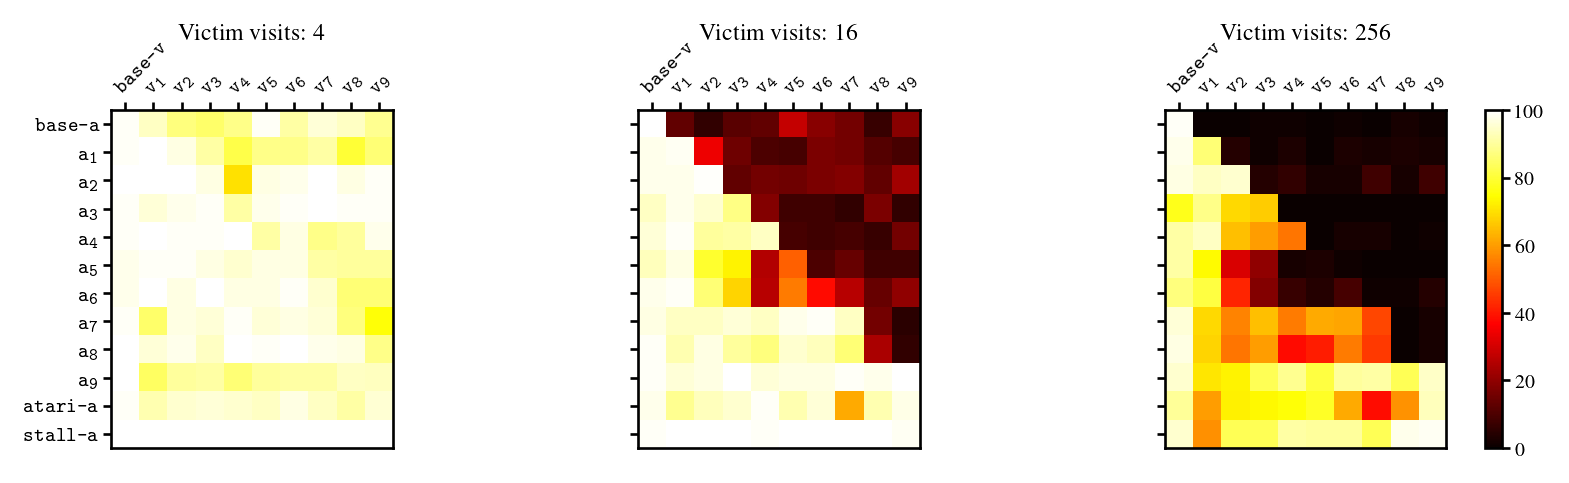

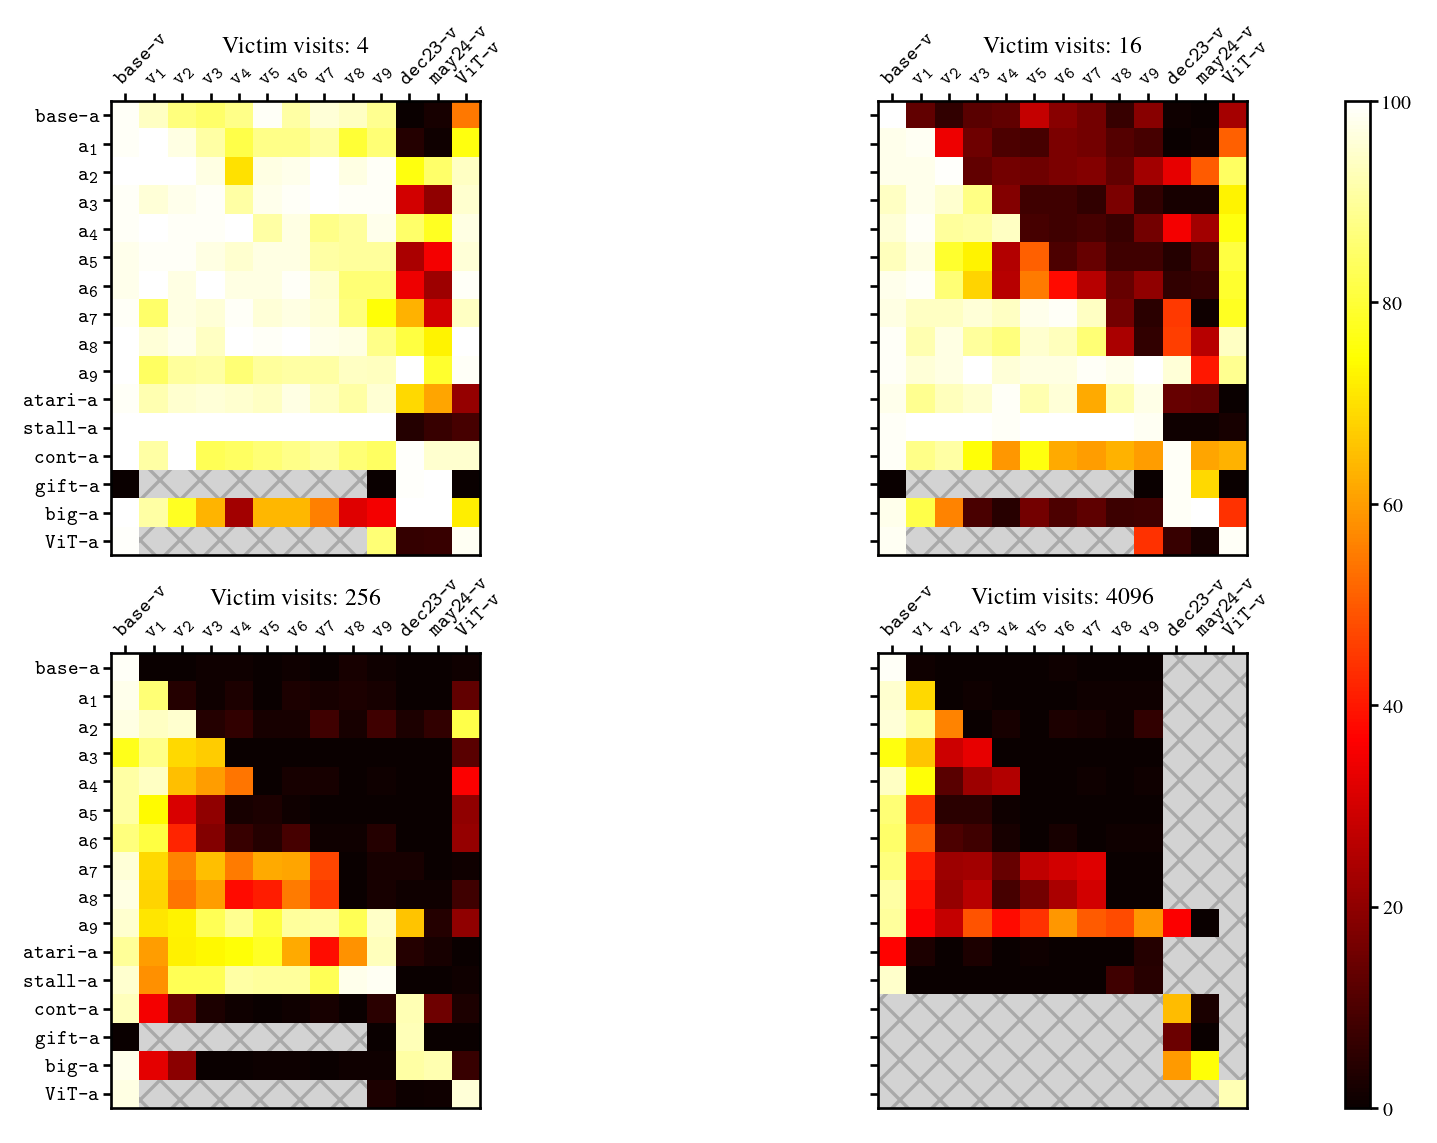

In [6]:
full_x_labels = (
    [r"\cpfivezerofiveshort{}"]
    + [rf"\defenseiter{{{i}}}" for i in range(1, 10)]
    + [r"\dectwentythreeshort{}", r"\maytwentyfourshort{}", r"\vitvictimshort{}"]
)
full_y_labels = (
    [r"\origcyclicshort{}"]
    + [rf"\attackiter{{{i}}}" for i in range(1, 10)]
    + [
        r"\attackhnineshort{}",
        r"\stalladvshort{}",
        r"\contadvshort{}",
        r"\koadvshort{}",
        r"\largeadvshort{}",
        r"\vitadversaryshort{}",
    ]
)
full_victim_visits = ["4", "16", "256", "4096"]

for label, x_labels_prefix, y_labels_prefix, victim_visits_prefix in [
    # Create one version of the plot with only iterated adv training for body of paper
    # and another version with all results.
    (
        "iteradvtrain",
        full_x_labels.index(r"\defenseiter{9}") + 1,
        full_y_labels.index(r"\stalladvshort{}") + 1,
        len(full_victim_visits) - 1,
    ),
    ("full", len(full_x_labels), len(full_y_labels), len(full_victim_visits)),
]:
    x_labels = full_x_labels[:x_labels_prefix]
    y_labels = full_y_labels[:y_labels_prefix]
    victim_visits = full_victim_visits[:victim_visits_prefix]

    num_subplots = len(victim_visits)
    num_subplot_rows = 2 if num_subplots > 3 else 1
    num_subplot_cols = int(math.ceil(num_subplots / num_subplot_rows))
    fig_height = 1.9 if num_subplot_rows == 1 else 4.65
    fig, axs = plt.subplots(
        num_subplot_rows,
        num_subplot_cols,
        figsize=(
            plt.rcParams["figure.figsize"][0],
            fig_height,
        ),
        sharey=True,
    )
    axs = axs.ravel()

    vmin = 0
    vmax = 100
    color_map = matplotlib.colormaps.get_cmap("hot")
    normalizer = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

    for ax, visits, block in zip(axs, victim_visits, data_blocks):
        data = np.array(block)

        # We usually report adversary win rates in our paper, so let's invert the
        # victim-win-rate data.
        # Also, let's put the adversaries as rows instead.
        data = 100 - data.T
        data = data[: len(y_labels), : len(x_labels)]

        ax.imshow(data, cmap=color_map, norm=normalizer)

        ax.set_xticks(np.arange(len(x_labels)))
        ax.set_yticks(np.arange(len(y_labels)))
        ax.set_xticklabels(
            (rf"\texttt{{{name}}}" for name in x_labels),
            rotation=45,
            ha="left",
            rotation_mode="anchor",
        )
        ax.set_yticklabels((rf"\texttt{{{name}}}" for name in y_labels))
        # Move x-axis labels to top so that r0 and h0 are together at the top-left
        # corner
        ax.xaxis.tick_top()

        ax.set_title(
            f"Victim visits: {visits}",
            # pad=0,
            # Reduce height further by shoving title towards x-axis labels
            y=1.15 if num_subplot_rows == 1 else 1.065,
        )

        # Set the appearance of NaN cells
        ax.patch.set(hatch="xx", facecolor="lightgray", edgecolor="darkgray")

    fig.tight_layout()
    if num_subplot_rows > 1:
        # Increase vertical space between plots so it's clearer which
        # subtitle appears on which subplot.
        fig.subplots_adjust(hspace=0.5)

    # We're creating this shared colorbar separate from the subplots so tight_layout
    # doesn't like it. We have to define the colorbar after tight_layout().
    color_bar_info = matplotlib.cm.ScalarMappable(cmap=color_map, norm=normalizer)
    fig.colorbar(
        color_bar_info,
        ax=axs,
        pad=0.025 if num_subplot_rows == 1 else 0.05,
        aspect=20 if num_subplot_rows == 1 else 40,
    )

    fig.savefig(f"win-rate-heatmap-{label}.pgf")